In [139]:
import numpy as np
import pandas as pd
from obspy import Catalog,read_events
import glob
from obspy import UTCDateTime
import json
import os
import time
import datetime
from datetime import datetime
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
#%%
from obspy import read

st = read('http://examples.obspy.org/RJOB_061005_072159.ehz.new')

#%%
# --------------- Load catalog data --------------------

ev_file = os.path.join('/home/miau/Descargas/Yel_2021Q4.csv')

# load event data
dq = pd.read_csv(ev_file)
dq['otime'] = dq['year'].astype(str) + '-' + dq['month'].astype(str) + '-' + dq['day'].astype(str) + ' ' + dq['hour'].astype(str) + ':' + dq['min'].astype(str) + ':' + dq['sec'].astype(str)
# parse dates
dq['otime'] = pd.to_datetime(dq['otime'])
dq['dep'] = dq['depth']

# parse dates
dq['otime'] = pd.to_datetime(dq['otime'])
# number of EQs
Neq = dq.shape[0]
print(f"Number of Catalog EQs Loaded:  {Neq}")
#%%

start_date = pd.Timestamp(year=2012, month=1, day=1)
end_date = pd.Timestamp(year=2023, month=12, day=31)
dq = dq[(dq['otime'] >= start_date) & (dq['otime'] <= end_date)]

base_dt = pd.to_datetime(min(dq['otime']))
#base_dt = pd.to_datetime('2010-01-05 05:12:40.030')
##hacemos delta T
dq['new_otime'] = dq['otime']

dq['new_otime']= dq['new_otime'] - base_dt
###Convierto a años
dq['new_otime']= dq['new_otime'].dt.total_seconds() / (365.25*24*3600)
dq= dq[['mag','new_otime', 'lat', 'lon', 'depth', 'rms', 'erh', 'erz', 'otime', 'gap']]
dq = dq.loc[(dq['gap'] == 'gap') | ((dq['gap'] < 180) & (dq['gap'] != 'gap'))]

dq['otime'] = pd.to_datetime(dq['otime'])

Number of Catalog EQs Loaded:  50073


# Guardo los datos

In [140]:
dq.to_csv('2012-2021.txt', sep=" ", index=False, header=True)

In [141]:
dq = dq[dq['mag'] > 1.5]

In [142]:
dq.to_csv('2012-2021.txt', sep=" ", index=False, header=True)

In [143]:
dq

,mag,new_otime,lat,lon,depth,rms,erh,erz,otime,gap
32400,1.56,0.035331,44.3243,-110.6693,6.63,0.09,0.5,1.1,2012-01-16 08:39:01.260,150
32403,2.52,0.038057,44.7408,-111.0137,5.03,0.16,0.4,0.7,2012-01-17 08:32:47.540,69
32430,1.53,0.102972,44.5458,-110.5988,2.36,0.21,0.7,15.1,2012-02-10 01:35:25.100,116
32432,1.62,0.117730,44.3708,-110.9703,6.78,0.18,0.5,0.9,2012-02-15 10:57:19.880,110
32440,1.59,0.131398,44.3523,-110.6622,2.34,0.14,0.4,12.2,2012-02-20 10:46:07.460,98
...,...,...,...,...,...,...,...,...,...,...
50060,1.55,9.967496,44.8083,-111.4845,11.38,0.15,0.4,0.6,2021-12-22 02:00:24.120,80
50063,2.46,9.973619,44.1615,-110.2592,11.36,0.21,0.5,0.8,2021-12-24 07:41:01.560,92
50067,1.88,9.982622,44.1592,-110.2503,13.39,0.14,0.4,1.1,2021-12-27 14:36:04.180,93
50069,1.60,9.984133,44.5643,-110.6903,5.68,0.19,0.4,2.2,2021-12-28 03:50:46.420,110


In [144]:
data = pd.read_table('2012-2021.txt', sep='\s+')

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from geopy import distance
import pandas as pd
import utm

##Constantes
q=0.5
b=1  
df= float(1.6)
##cargamos los años, lat, lon y mag

#data = '2012-2021.txt'
#data= np.loadtxt(data)

data = pd.read_table('2012-2021.txt', sep='\s+')
#time= data[:, 1]
#lat= data[:, 2]
#lon = data[:, 3]
#mag= data[:, 0]
#dep= data[:,4]


time= data['new_otime']
lat= data['lat']
lon = data['lon']
mag= data['mag']
dep= data['depth']

x= []
y=[]
for i,j in zip(lat,lon):
    coord= utm.from_latlon(i, j)
    x.append(coord[1]/1000)
    y.append(coord[0]/1000)

In [146]:
#+ (dep[j]-dep[:j])**2
results= []
listan =[]
T_N= []
X_N= []
N_clust= []
singles=[]
index= []
clust=[]
indclust=[]
listaind =[]
listaj=[]
listanew=[]
laq=[]

for j in range(1,len(time)):
    delta_t= time[j] - time[:j]
    distance = np.sqrt((x[j]-x[:j])**2 + (y[j]-y[:j])**2)
    T = delta_t*(np.power(10,-q*mag[:j])) 
    X = np.power(distance, df)*np.power(10,((-1+q)*b*mag[:j]))
    N = np.amin(T*X)
    results.append((N))
    item_index = np.where(T*X==N)
    #T_N.append(T[item_index])
    #X_N.append(X[item_index])
    hola = item_index[0]
    hola1 = hola[0]
    index.append(hola1)
    T_N.append(T[hola1])
    X_N.append(X[hola1])
    #print(j,hola)
    if N>10**(-4.5):
        #10e-5:
        singles.append(j)
        clust.append(j)
        indclust.append('')
    
    if N<10**(-4.5):
        clust.append(j)
        indclust.append(item_index)    
    
Nv = np.asarray(results)
T_N= np.asarray(T_N, dtype='object')
X_N= np.asarray(X_N, dtype='object')
#T_N =np.concatenate(T_N)
#X_N =np.concatenate(X_N)
#T_N = np.reshape(T_N,-1).astype(float)
#X_N = np.reshape(X_N,-1).astype(float)
Nv = np.asarray(results)

In [147]:
##### from collections import Counter
import matplotlib.pyplot as plt

lista0 =[]
lista1= []
lista2=[]
enjambre1=[]
parent=[]
index_parent= []

for i in range(1, len(time)):
    lista= []
    indexlist= index[i-1]
    if i in singles:
        lista.append(0) 
    lista.append(indexlist)
    lista0.append(lista)
    newlista = lista0[indexlist-1]
    lista.extend(newlista)
    index0 = lista.index(0)
    #lista de cada rama
    lista = lista[:index0]
    #lista que contiene todas las listas correspondientes a cada rama
    lista1.append(lista)
    #lista que contiene la longitud de cada rama
    lista2.append(len(lista))
    #guardo padre de cada sismo 
    parent.append(lista[-1:])    
    #print(lista[-1:])
    #print(i, lista)

In [148]:
from collections import Counter
import matplotlib.pyplot as plt

last_element=[]
for j in parent:
    ##si son diferentes, es decir que tiene por lo menos 1 NN
    if j!= []:
        
        last_element.append(j[0])
    ##singles    
    else:
        last_element.append(0)
        
#me da la familia de cada padre    
counts = dict(Counter(last_element))

##Obteniendo la cantidad de familiares de cada padre 
items = counts.items()
items1= []
for i in items:
    items1.append(i)

resultado = [tup[1] for tup in items1]

In [149]:
from collections import defaultdict

def list_duplicates(seq):
    tally = defaultdict(list)
    for i,item in enumerate(seq):
        tally[item].append(i+1)
    return ((key,locs) for key,locs in tally.items() 
                            if len(locs)>=1)
ind_clust_size= []

for dup in sorted(list_duplicates(last_element)):
    ind_clust_size.append(dup)
    
padres = [tup[0] for tup in ind_clust_size]
family =[tup[1] for tup in ind_clust_size]


for elem in padres:
    if elem in singles:
        singles.remove(elem)

In [150]:
padres1 = padres[1:]
list1 = []
all_rama = []
inicial= []
lista_hijos =[]
nueva_lista=[]
not_leaf= []

for i in range(0, len(padres1)+1):
    hijos = family[i]
    all_rama= []
    for j in hijos:
        list1= lista1[j-1]
        all_rama.extend(list1)     
    not_leaf.append(set(all_rama))
    nueva_lista.append(all_rama)
     
nue = [list(i) for i in not_leaf]
counter= []
garb= []
rama =[]
ramas_clust =[]

for i in range(0, len(nueva_lista)):
    rama= []
    hijos1 = family[i]
    nuef= nue[i]
    for count,j in enumerate(hijos1):
        if j in nuef:
            #print(i, 'no', j)
            garb.append(j)
        else:
            rama.append(j)
    counter.append(count)
    ramas_clust.append(rama)

In [151]:
longitudes = [[len(lista1[i-1])+1 for i in lista] for lista in ramas_clust]
mean_ld=[]
for i in longitudes:
    mean_ld.append(np.mean(i))

In [152]:
#enjambre más grande en el intervalo de tiempo seleccionado
cantidad= []
for i in family[1:]:
    #clustt = i[1]
    cantidad.append(len(i))

maximo= max(cantidad)
indice_max= cantidad.index(maximo) 
print('cluster más grande:',indice_max,'con un total de',cantidad[indice_max],'todos los tamaños de los cluster:', cantidad)

cluster más grande: 157 con un total de 345 todos los tamaños de los cluster: [2, 1, 1, 2, 1, 1, 2, 2, 1, 43, 1, 4, 1, 3, 2, 2, 1, 3, 2, 4, 1, 1, 1, 1, 7, 1, 3, 1, 3, 3, 3, 1, 9, 1, 1, 1, 1, 1, 1, 4, 13, 1, 1, 10, 1, 12, 2, 87, 66, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 50, 1, 1, 2, 2, 1, 1, 8, 28, 12, 1, 1, 4, 5, 6, 12, 1, 1, 5, 3, 13, 84, 3, 5, 4, 3, 1, 4, 29, 1, 15, 4, 8, 1, 2, 4, 1, 4, 1, 2, 4, 1, 1, 5, 2, 4, 6, 2, 1, 1, 4, 1, 2, 1, 1, 5, 1, 1, 8, 1, 2, 4, 4, 2, 1, 1, 1, 2, 3, 3, 1, 1, 1, 3, 5, 3, 1, 7, 1, 17, 2, 1, 1, 2, 2, 1, 4, 1, 1, 2, 1, 8, 1, 1, 4, 345, 1, 9, 1, 2, 78, 2, 4, 7, 1, 1, 1, 8, 6, 1, 1, 180, 1, 1, 10, 1, 41, 1, 4, 1, 1, 1, 8, 2, 2, 3, 2, 15, 1, 3, 5, 3, 2, 1, 7, 3, 1, 1, 22, 5, 2, 2, 1, 3, 4, 1, 2, 2, 1, 4, 3, 1, 1, 1, 1, 3, 1, 8, 2, 1, 3, 12, 2, 2, 1, 16, 2, 1, 1, 1, 4, 1, 1, 2, 7, 4, 3, 1, 5, 28, 4, 2, 1, 2, 51, 1, 1, 2, 2, 2, 18, 6, 3, 2, 2, 3, 2, 1, 1, 1, 2, 3, 1, 24, 13, 1, 2, 4, 262, 1, 1, 1, 1, 2, 2, 7, 1, 1, 2, 3, 2, 12, 1, 1, 1, 6, 2, 1, 2, 1, 1, 1]


In [153]:
indices = [i for i, x in enumerate(cantidad) if x > 200]
valores = [x for x in cantidad if x > 200]
print(indices, valores)

[157, 270] [345, 262]


In [154]:
diccionario = {}
for i in indices:
    enjambre= family[i+1]
    data_enjambre= data.iloc[enjambre]
    time_enjambre = data_enjambre['otime']
    lat_enjambre= data_enjambre['lat']
    lon_enjambre= data_enjambre['lon']
    mag_enjambre= data_enjambre['mag']
    padre_enjambre = padres[i+1]
    ultimo_sismo= enjambre[-1:]
    mlf=mean_ld[i+1]
    diccionario[i] = {"padre": padre_enjambre, "ultimo sismo": ultimo_sismo, "mean leaf": mlf, "Parientes": data_enjambre, 'Latitudes': lat_enjambre, 'Longitudes': lon_enjambre}
    print(i, diccionario[i])

157 {'padre': 1380, 'ultimo sismo': [2170], 'mean leaf': 8.07843137254902, 'Parientes':        mag  new_otime      lat       lon  depth   rms  erh  erz  \
1381  3.13   5.440776  44.7848 -111.0240  11.09  0.07  0.5  1.3   
1382  2.71   5.440779  44.7802 -111.0257   9.00  0.16  0.5  0.8   
1383  2.10   5.440782  44.7818 -111.0228   8.76  0.16  0.6  0.9   
1384  1.63   5.440819  44.7837 -111.0237   8.78  0.15  0.6  0.8   
1385  2.04   5.440886  44.7833 -111.0263   9.40  0.15  0.5  0.8   
...    ...        ...      ...       ...    ...   ...  ...  ...   
1871  1.61   5.872588  44.7790 -111.0503   9.24  0.16  0.4  0.7   
1877  1.57   5.926451  44.7818 -111.0175   8.13  0.16  0.4  0.8   
1879  1.88   5.943677  44.7840 -111.0222   8.35  0.16  0.5  0.7   
2080  2.07   6.147159  44.7535 -110.9910   8.98  0.13  0.5  0.7   
2170  1.75   6.357948  44.7630 -111.0037  11.83  0.17  0.5  0.6   

                        otime  gap  
1381  2017-06-12 16:46:47.050  167  
1382  2017-06-12 16:48:09.860  16

In [155]:
#Datos singles
data_singles= data.iloc[singles]
lat_singles = data_singles['lat']
lon_singles = data_singles['lon']


In [156]:
datos_diccionario = {}


for i in indices:
    ind_primer_sismo = diccionario[i]['padre']
    ind_ultimo_sismo = diccionario[i]['ultimo sismo']
    primer_sismo= data.iloc[ind_primer_sismo]
    ultimo_sismo= data.iloc[ind_ultimo_sismo[0]]
    t_ps=primer_sismo[1]
    t_us=ultimo_sismo[1]
    duracion_enjambre= t_us-t_ps
    mean_leaf= mean_ld[i]
    cantidad_de_sismos= len(diccionario[i]['Parientes'])

    datos_diccionario[i] = {
        'ind_primer_sismo': ind_primer_sismo,
        'ind_ultimo_sismo': ind_ultimo_sismo,
        'primer_sismo': primer_sismo,
        'ultimo_sismo': ultimo_sismo,
        't_ps': t_ps,
        't_us': t_us,
        'duracion_enjambre': duracion_enjambre,
        'mean_leaf': mean_leaf,
        'cantidad_de_sismos': cantidad_de_sismos
        }

In [157]:
indices

[157, 270]

[157, 270]


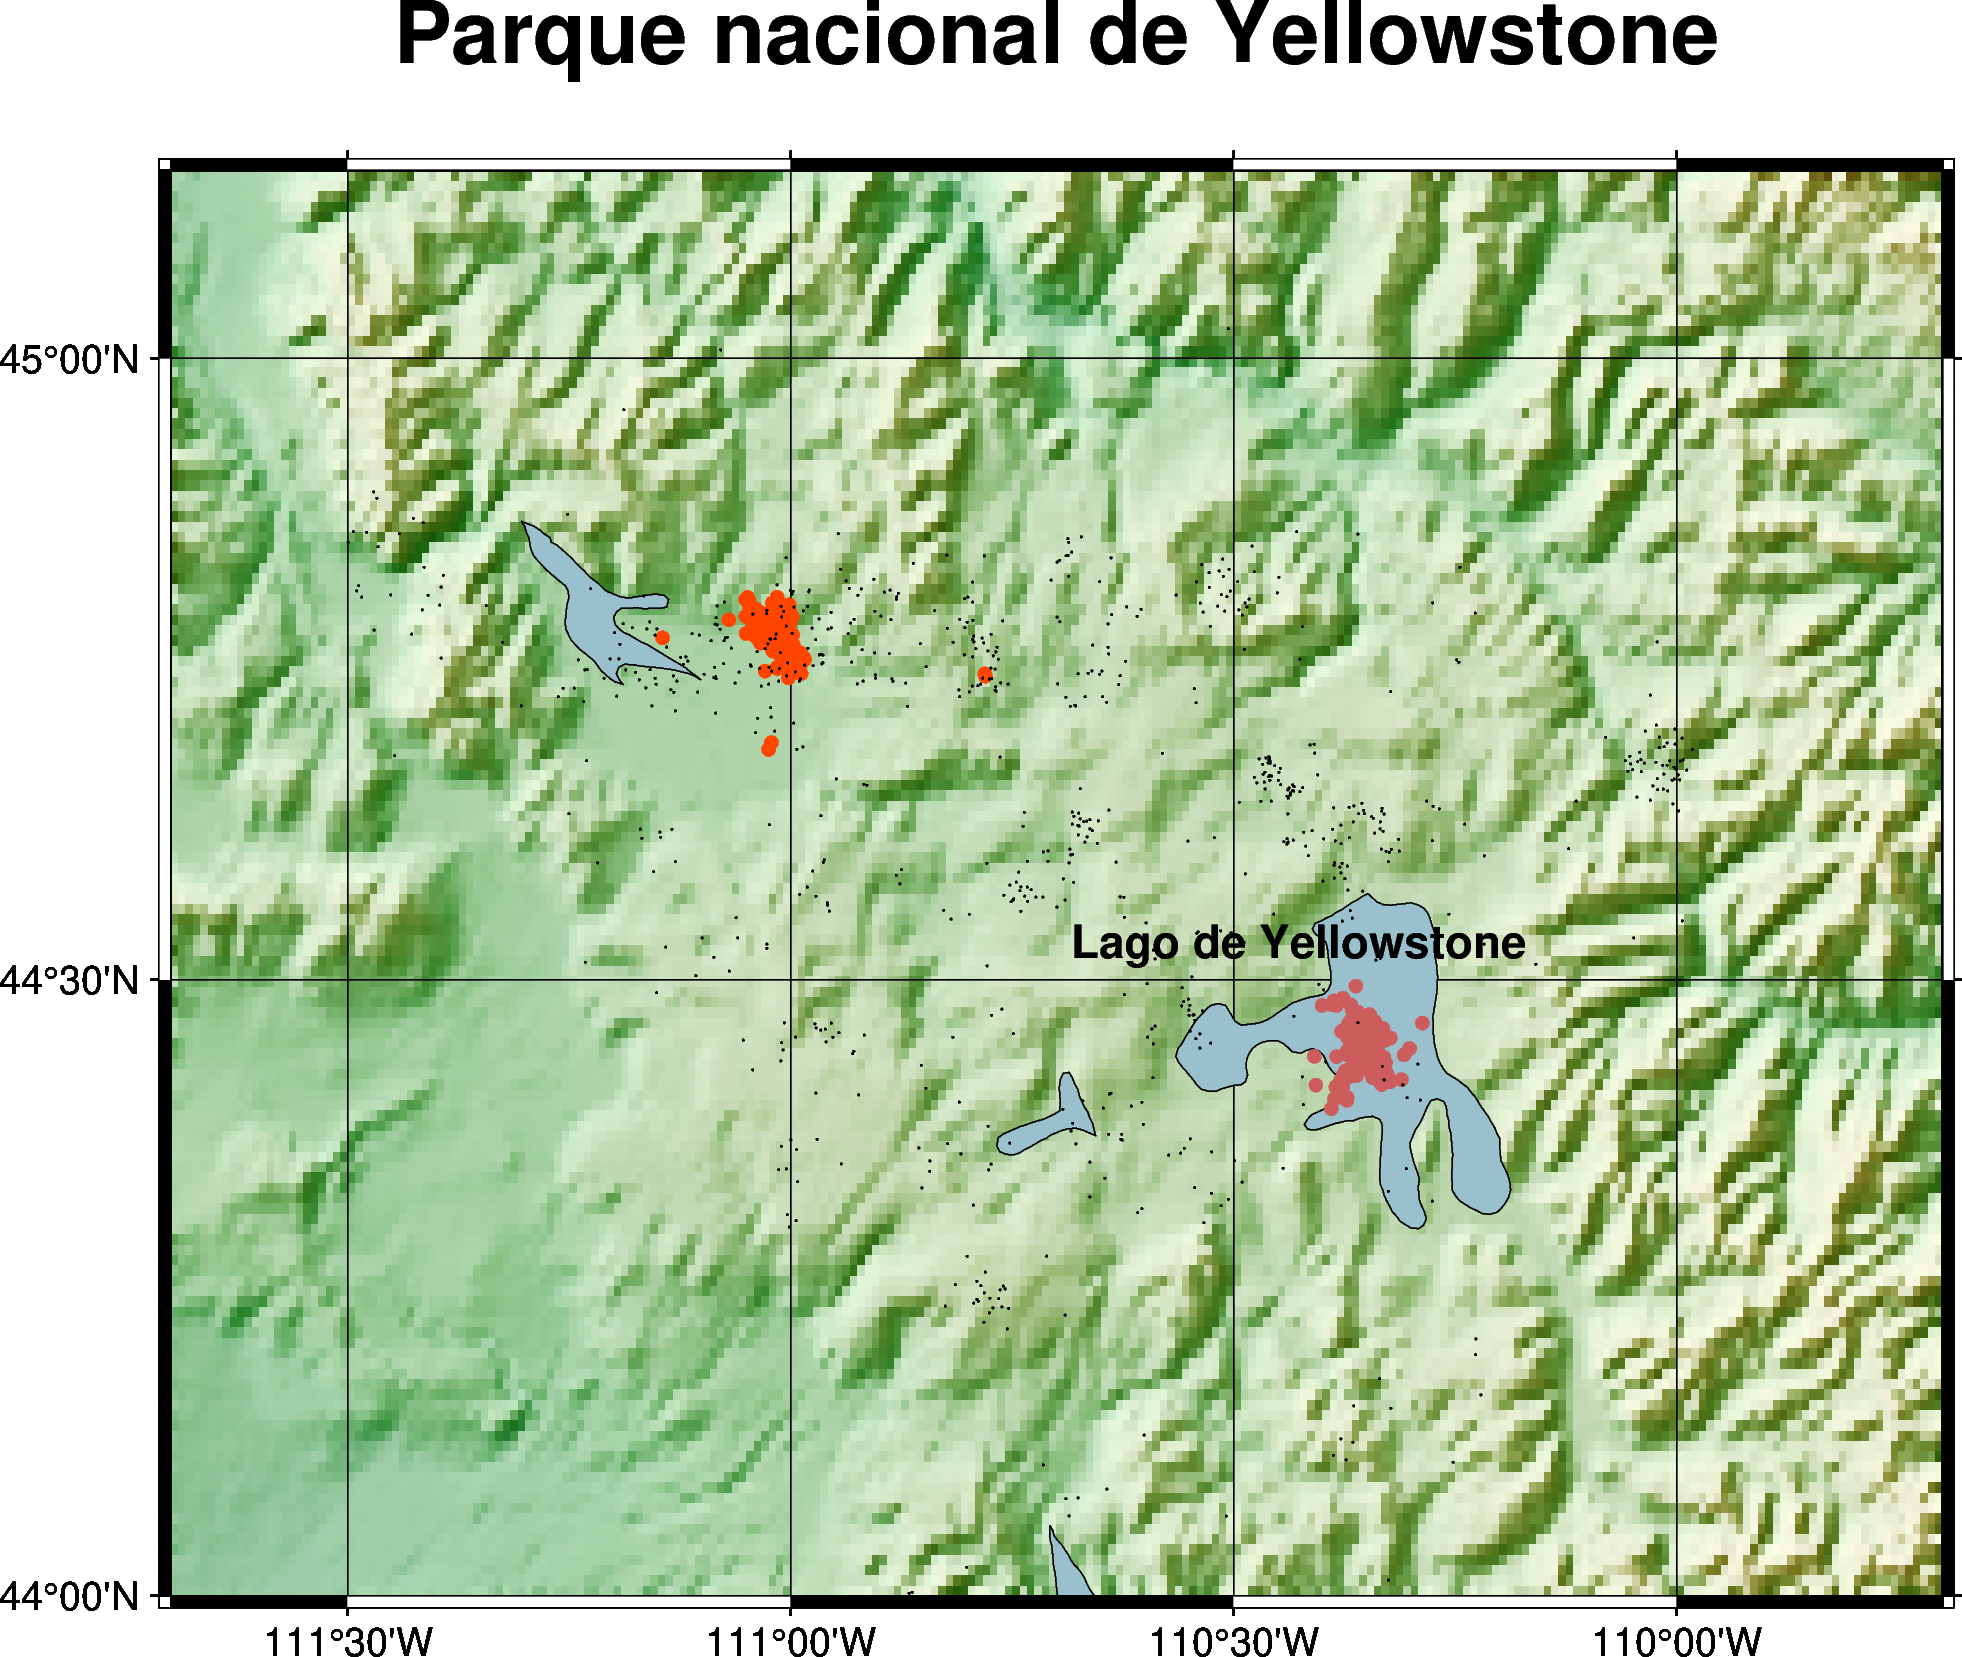

In [158]:
import pygmt 
import matplotlib.pyplot as plt 
import pandas as pd
from datetime import datetime


#indices = [271, 636, 704, 1212]


latmin, latmax, lonmin, lonmax= 44.00, 45.15,-111.70, -109.70

region= region = [
    lonmin ,
    lonmax ,
    latmin ,
    latmax,
]

print(indices)
topo_data = "@earth_relief_30s"

fig = pygmt.Figure()

pygmt.makecpt(
    cmap='topo',
    series= '0/4800/4800',
    continuous=True
)

fig.grdimage(
    region=region,
    grid= topo_data,
    projection="M15c",
   shading= True,
    transparency= 80,
    frame="ag",
)



fig.coast(
    region=region, 
    projection='M15c', 
    shorelines=True,
    water= "LightBlue3",
    frame=True,
    #land= 'darkseagreen',
    borders="1/0.5p",
)

colores = ['orangered', 'indianred', 'blue4', 'firebrick4']
for i, indice in enumerate(indices):
    fig.plot(
        x=diccionario[indice]['Longitudes'],
        y=diccionario[indice]['Latitudes'],
        style="c0.12c",
        color=colores[i],
        transparency=100,
    )

fig.plot(
        x=lon_singles,
        y=lat_singles,
        style="c0.023",
        color='black',
        transparency=10,
    )


fig.text(
    x=-110.4,
    y=44.55,
    text="Lago de Yellowstone",
    font="11p,Helvetica-Bold,black",
    justify="CM",
    offset="-0.2c/-0.2c",
)


fig.basemap(frame=["a", "+tParque nacional de Yellowstone"])
fig.show()

In [186]:
time_enjambre = time_enjambre.iloc[:-4]
time_enjambre

1381   2017-06-12 16:46:47.050
1382   2017-06-12 16:48:09.860
1383   2017-06-12 16:49:49.210
1384   2017-06-12 17:09:20.780
1385   2017-06-12 17:44:20.910
                 ...          
1827   2017-08-27 20:38:17.490
1828   2017-08-27 22:32:04.110
1829   2017-08-28 04:22:27.030
1831   2017-09-02 13:40:46.410
1833   2017-09-04 00:20:26.810
Name: otime, Length: 337, dtype: datetime64[ns]

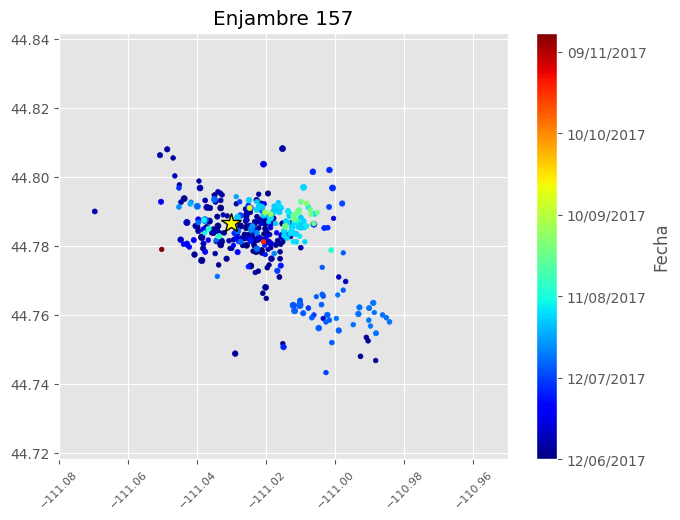

In [185]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# escala de color
cmap = plt.cm.get_cmap('jet')

# Estilo
plt.style.use('ggplot')

size = 30
i= 157

enjambre = family[i+1]
enjambre = enjambre[:-4]
data_enjambre = data.iloc[enjambre]
#time_enjambre= time_enjambre.iloc[:-4]
time_enjambre = pd.to_datetime(data_enjambre['otime'])
lat_enjambre = data_enjambre['lat']
lon_enjambre = data_enjambre['lon']
mag_enjambre = data_enjambre['mag']
ps= datos_diccionario[i]['primer_sismo']
lat_ps=ps[2]
lon_ps=ps[3]
#plt.plot(lon_ps, lat_ps, marker='*', color='yellow')
plt.plot(lon_ps, lat_ps, marker='*', color='yellow', markersize=15, markeredgecolor='black')

# Convertir las fechas a números de días desde el primer día de los datos

#ref_date=datos_diccionario[652]['primer_sismo']['otime']
#days_since_ref = (time_enjambre - ref_date).apply(lambda x: x.days)
ref_date = pd.to_datetime(datos_diccionario[i]['primer_sismo']['otime'])
days_since_ref = (time_enjambre - ref_date).apply(lambda x: x.days)
colors = days_since_ref

# tamaño de los puntos segn la magnitud
sizes = size * mag_enjambre / np.max(mag_enjambre)
sizes = np.abs(sizes)
# Para que size no sea cero
if sizes.size == 0:
    sizes = np.array([size])

plt.scatter(lon_enjambre, lat_enjambre, s=sizes, c=colors, cmap=cmap)
#  densidad de datos
plt.axis('equal')
plt.tight_layout()


plt.xlim(-111.08, -110.95)
plt.ylim(44.76, 44.80)
plt.xticks(fontsize=8, rotation=45)

#numeros de días a fechas para mostrar en la barra de color
#seleccionO los valores de los ticks de la barra de color
ticks = np.arange(0, np.max(days_since_ref)+1, 30)
#convertir los numeros de días a fechas
tick_labels = [ref_date + pd.Timedelta(days=d) for d in ticks] 
cbar = plt.colorbar(ticks=ticks, format="%d/%m/%Y")
#mostrar las fechas en la barra de color
cbar.ax.set_yticklabels([d.strftime('%d/%m/%Y') for d in tick_labels]) 
cbar.set_label('Fecha')

plt.title(f'Enjambre {i}')
plt.show()
